# Performance Reporting With Rolling 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import yfinance 

In [2]:
yfinance.pdr_override()

In [13]:
ihsg = wb.get_data_yahoo('^JKSE', start = '2007-01-01', end = '2023-03-31')
ihsg.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-02,1813.449951,1836.520020,1813.449951,1836.520020,1836.520020,23595900
2007-01-03,1832.069946,1837.074951,1829.598999,1834.708984,1834.708984,1531300
2007-01-04,1839.560059,1843.348999,1820.817993,1824.103027,1824.103027,34667400
2007-01-05,1817.566040,1832.550049,1813.901978,1832.550049,1832.550049,39872500
2007-01-08,1818.011963,1818.827026,1804.328003,1813.394043,1813.394043,34902600


In [14]:
ihsg_close = ihsg[['Close']]
ihsg_close.head()

,Close
Date,
2007-01-02,1836.520020
2007-01-03,1834.708984
2007-01-04,1824.103027
2007-01-05,1832.550049
2007-01-08,1813.394043


## Resampling to Monthly 

In [15]:
ihsg_close_copy = ihsg_close.copy()
ihsg_close_copy.resample('M', kind = 'period').last()

,Close
Date,
2007-01,1757.258057
2007-02,1740.970947
2007-03,1830.923950
2007-04,1999.166992
2007-05,2084.323975
...,...
2022-11,7081.312988
2022-12,6850.619141
2023-01,6839.341797


In [16]:
monthly_return = ihsg_close_copy.resample('M', kind = 'period').last().pct_change().dropna()
monthly_return

,Close
Date,
2007-02,-0.009268
2007-03,0.051668
2007-04,0.091890
2007-05,0.042596
2007-06,0.026365
...,...
2022-11,-0.002476
2022-12,-0.032578
2023-01,-0.001646


### Getting Annualized Mean Return For The Preeceding 36 Months

In [23]:
monthly_return.rolling(36).mean() * 12

,Close
Date,
2007-02,NaN
2007-03,NaN
2007-04,NaN
2007-05,NaN
2007-06,NaN
...,...
2022-11,0.068748
2022-12,0.041936
2023-01,0.060409


In [24]:
monthly_return['return'] = monthly_return.rolling(36).mean() * 12

In [26]:
monthly_return.head(37)

,Close,return
Date,,
2007-02,-0.009268,NaN
2007-03,0.051668,NaN
2007-04,0.091890,NaN
2007-05,0.042596,NaN
2007-06,0.026365,NaN
2007-07,0.097881,NaN
2007-08,-0.065711,NaN
2007-09,0.075133,NaN
2007-10,0.120499,NaN


### Getting Annualized Risk For The Preeceding 36 Months

In [28]:
monthly_return['Close'].rolling(36).std() * 12**0.5

Date
2007-02         NaN
2007-03         NaN
2007-04         NaN
2007-05         NaN
2007-06         NaN
             ...   
2022-11    0.166387
2022-12    0.165885
2023-01    0.161988
2023-02    0.153565
2023-03    0.113549
Freq: M, Name: Close, Length: 194, dtype: float64

In [29]:
monthly_return['risk'] = monthly_return['Close'].rolling(36).std() * 12**0.5
monthly_return.head(37)

,Close,return,risk
Date,,,
2007-02,-0.009268,NaN,NaN
2007-03,0.051668,NaN,NaN
2007-04,0.091890,NaN,NaN
2007-05,0.042596,NaN,NaN
2007-06,0.026365,NaN,NaN
2007-07,0.097881,NaN,NaN
2007-08,-0.065711,NaN,NaN
2007-09,0.075133,NaN,NaN
2007-10,0.120499,NaN,NaN


In [30]:
monthly_return.dropna(inplace = True)

In [32]:
monthly_return.head()

,Close,return,risk
Date,,,
2010-01,0.030161,0.186703,0.320257
2010-02,-0.023657,0.181907,0.320747
2010-03,0.089551,0.194534,0.322963
2010-04,0.069834,0.187182,0.321439
2010-05,-0.058660,0.153430,0.323830


In [33]:
monthly_return.tail()

,Close,return,risk
Date,,,
2022-11,-0.002476,0.068748,0.166387
2022-12,-0.032578,0.041936,0.165885
2023-01,-0.001646,0.060409,0.161988
2023-02,0.000570,0.087947,0.153565
2023-03,-0.005010,0.142138,0.113549


## Visualizing The Annualized Monthly Return & Risk

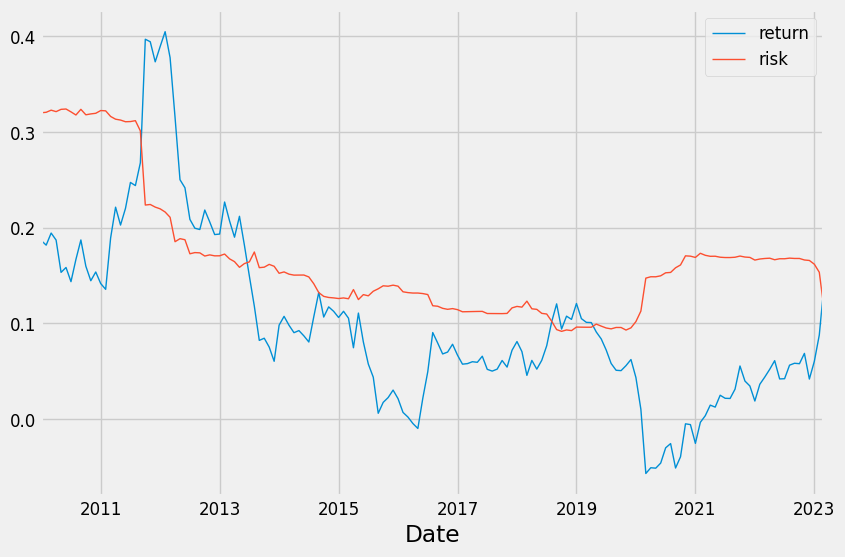

In [38]:
plt.style.use('fivethirtyeight')
monthly_return.iloc[:, -2:].plot(figsize = (9,6), fontsize = 12, linewidth = 1)
plt.legend(fontsize = 12)
plt.show()

In [40]:
monthly_return.iloc[:, -2:].corr()

,return,risk
return,1.000000,0.496685
risk,0.496685,1.000000


### Scatter Plot of Risk & Return

<Axes: xlabel='risk', ylabel='return'>

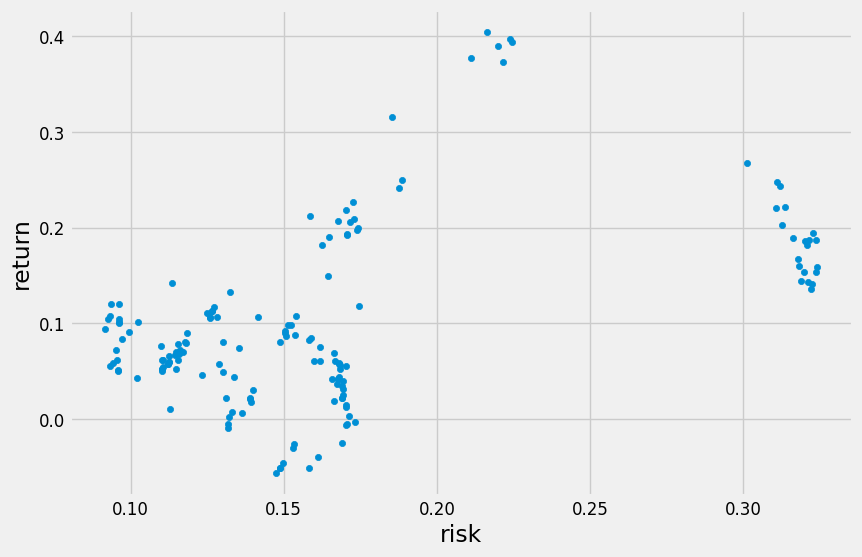

In [43]:
monthly_return.iloc[:, -2:].plot(kind = 'scatter', x='risk', y ='return', figsize = (9,6), fontsize = 12)